In [1]:
import eval_lib.eval_utils as eut
import eval_lib.eval_config as ec

In [2]:
import sys
sys.path.append(ec.midi_lib_dir)

import midi_file_utils as mfu
from converter.midi_file_object_to_midi_dto import midi_file_object_to_midi_dto_converter

In [3]:
midi_file_path = '../Evaluation/data_for_testing/GapLaiNamTa60.mid'

In [4]:
midi_file_obj = mfu.read_midi_file(midi_file_path)
midi_dto = midi_file_object_to_midi_dto_converter(midi_file_obj)

key_sigs = eut.midi_key_signature_detector(midi_dto)

print(len(key_sigs))

for key_sig in key_sigs:
    print(key_sig.time, key_sig.key_name)


SORTED
m_instruments:  2
break
     note.start:  48  current_max_note_end_time:  48
     note.start:  768  current_max_note_end_time:  48
break
     note.start:  96  current_max_note_end_time:  96
     note.start:  768  current_max_note_end_time:  96
break
     note.start:  144  current_max_note_end_time:  144
     note.start:  768  current_max_note_end_time:  144
break
     note.start:  240  current_max_note_end_time:  240
     note.start:  768  current_max_note_end_time:  240
break
     note.start:  288  current_max_note_end_time:  288
     note.start:  768  current_max_note_end_time:  288
break
     note.start:  336  current_max_note_end_time:  336
     note.start:  768  current_max_note_end_time:  336
break
     note.start:  384  current_max_note_end_time:  384
     note.start:  768  current_max_note_end_time:  384
break
     note.start:  432  current_max_note_end_time:  432
     note.start:  768  current_max_note_end_time:  432
break
     note.start:  480  current_max_note_end_tim

In [5]:
print(midi_dto.instruments[0].notes)
print(eut.key_signature_prototypes)

[<dto.Note.NoteDTO object at 0x109fbec80>, <dto.Note.NoteDTO object at 0x109fbecb0>, <dto.Note.NoteDTO object at 0x109fbed10>, <dto.Note.NoteDTO object at 0x109fbed70>, <dto.Note.NoteDTO object at 0x109fbedd0>, <dto.Note.NoteDTO object at 0x109fbee30>, <dto.Note.NoteDTO object at 0x109fbee90>, <dto.Note.NoteDTO object at 0x109fbeef0>, <dto.Note.NoteDTO object at 0x109fbef50>, <dto.Note.NoteDTO object at 0x109fbefb0>, <dto.Note.NoteDTO object at 0x109fbf010>, <dto.Note.NoteDTO object at 0x109fbf070>, <dto.Note.NoteDTO object at 0x109fbf0d0>, <dto.Note.NoteDTO object at 0x109fbf130>, <dto.Note.NoteDTO object at 0x109fbf190>, <dto.Note.NoteDTO object at 0x109fbf1f0>, <dto.Note.NoteDTO object at 0x109fbf250>, <dto.Note.NoteDTO object at 0x109fbf2b0>, <dto.Note.NoteDTO object at 0x109fbf310>, <dto.Note.NoteDTO object at 0x109fbf370>, <dto.Note.NoteDTO object at 0x109fbf3d0>, <dto.Note.NoteDTO object at 0x109fbf430>, <dto.Note.NoteDTO object at 0x109fbf490>, <dto.Note.NoteDTO object at 0x109

In [6]:
a_minor = [2, 9, 11, 0, 7 + 12, 4, (5 + 12 * 5)]
# a_minor = [8, 5, 9, 11, 0, 2, 4]
# a_minor = [2, 5, 4, 9, 11, 0, 8]
# a_minor = [9, 11, 0, 2, 4, 5, 7]
# a_minor = [x + 12 for x in a_minor]

print(a_minor)

key = eut.key_signature_from_midi_note_numbers(a_minor, root_note_number=eut.C4_midi_note_number + 9)
print(eut.based_midi_note_numbers[key[0]][0])
print(key[1])

[2, 9, 11, 0, 19, 4, 65]
MIDI NOTE NUMBERS:  [0, 65, 2, 4, 9, 11, 19]
SORTED MIDI NOTE NUMBERS:  [0, 2, 4, 5, 7, 9, 11]
MIDI NOTE NUMBERS BEFORE INTERVALS CAL:  [9, 11, 0, 2, 4, 5, 7]
Intervals:  [2, 1, 2, 2, 1, 2, 2]
A
minor


In [7]:
midi_note_numbers = [0, 1, 2, 3, 4, 5]
print(str(midi_note_numbers))
root_note_idx = 3

midi_note_numbers = midi_note_numbers[root_note_idx:] + midi_note_numbers[:root_note_idx]
print(midi_note_numbers)

[0, 1, 2, 3, 4, 5]
[3, 4, 5, 0, 1, 2]


In [8]:
# 🔴🟠🟡🟢🔵🟣⚫️⚪️🟤🔺🔸🔹🔶🔷🟥🟧🟨🟩🟦🟪⬛️⬜️🟫

class ColorfulCharacter:
    BLUE_SQUARE = '\U0001F7E6'
    GREEN_SQUARE = '\U0001F7E9'
    RED_SQUARE = '\U0001F7E5'
    ORANGE_SQUARE = '\U0001F7E7'
    YELLOW_SQUARE = '\U0001F7E8'
    PURPLE_SQUARE = '\U0001F7EA'
    BLACK_SQUARE = '\U00002B1B'
    GRAY_SQUARE = '\U00002B1C'

class LabelValue:
    YES = [1, 0, 0]
    NO = [0, 1, 0]
    UNKNOWN = [0, 0, 1]

label_value_to_colorful_character_mapper = {
    str(LabelValue.YES): ColorfulCharacter.GREEN_SQUARE,
    str(LabelValue.NO): ColorfulCharacter.RED_SQUARE,
    str(LabelValue.UNKNOWN): ColorfulCharacter.BLACK_SQUARE
}

def label_value_to_colorful_character(label_value):
    return label_value_to_colorful_character_mapper[
        str(label_value)
    ]

label_value_yes = [1, 0, 0]
label_value_no = [0, 1, 0]
label_value_unknown = [0, 0, 1]

print(f"{str(label_value_yes)}: {label_value_to_colorful_character(label_value_yes)}")
print(f"{str(label_value_no)}: {label_value_to_colorful_character(label_value_no)}")
print(f"{str(label_value_unknown)}: {label_value_to_colorful_character(label_value_unknown)}")

[1, 0, 0]: 🟩
[0, 1, 0]: 🟥
[0, 0, 1]: ⬛


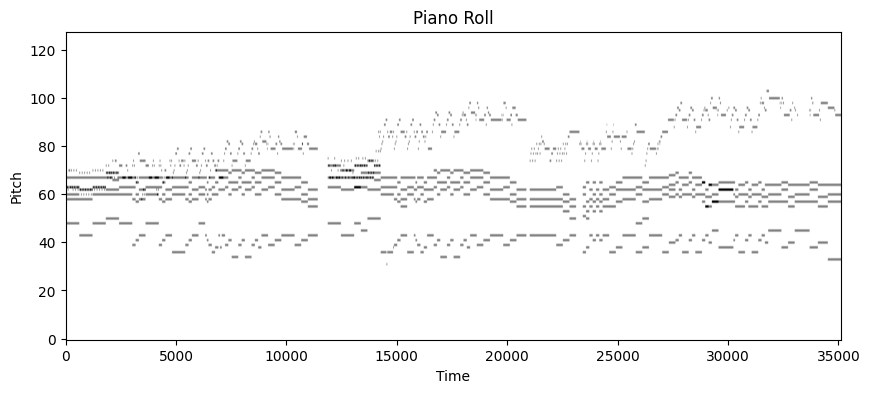

Melody notes: [70, 63, 62, 70, 63, 70, 63, 62, 70, 63, 62, 70, 63, 62, 63, 69, 62, 60, 69, 62, 60, 69, 62, 60, 69, 62, 60, 69, 62, 60, 62, 70, 63, 62, 70, 63, 62, 70, 63, 62, 70, 63, 62, 70, 63, 62, 63, 72, 69, 67, 72, 69, 67, 69, 67, 74, 69, 67, 74, 69, 67, 72, 72, 67, 67, 67, 72, 72, 70, 67, 67, 72, 74, 72, 67, 67, 65, 67, 77, 58, 60, 62, 60, 74, 62, 72, 72, 67, 67, 67, 72, 74, 72, 67, 62, 60, 67, 62, 72, 74, 72, 70, 67, 65, 67, 70, 67, 74, 72, 74, 67, 69, 70, 72, 77, 79, 74, 72, 72, 74, 74, 72, 74, 67, 69, 70, 72, 77, 79, 74, 72, 72, 74, 67, 69, 70, 72, 77, 79, 74, 72, 72, 74, 67, 70, 77, 74, 72, 72, 70, 72, 74, 67, 74, 77, 79, 82, 81, 77, 72, 74, 74, 77, 79, 82, 81, 77, 72, 74, 74, 77, 79, 81, 82, 81, 81, 79, 77, 77, 84, 86, 82, 81, 79, 81, 86, 84, 79, 81, 81, 77, 84, 82, 81, 79, 81, 79, 81, 86, 84, 79, 81, 81, 77, 84, 81, 79, 75, 72, 67, 67, 70, 67, 67, 72, 75, 72, 67, 67, 70, 67, 67, 70, 74, 67, 70, 72, 74, 67, 70, 70, 74, 67, 70, 70, 74, 67, 69, 67, 67, 72, 75, 67, 72, 75, 67, 7

In [9]:
import mido
import pretty_midi
import matplotlib.pyplot as plt
import numpy as np

def load_midi(file_path):
    midi_data = pretty_midi.PrettyMIDI(file_path)
    return midi_data

def plot_piano_roll(midi_data):
    piano_roll = midi_data.get_piano_roll()
    plt.figure(figsize=(10, 4))
    plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='gray_r')
    plt.title('Piano Roll')
    plt.xlabel('Time')
    plt.ylabel('Pitch')
    plt.show()

def analyze_melody(midi_data):
    melody = []
    for instrument in midi_data.instruments:
        if not instrument.is_drum:
            for note in instrument.notes:
                melody.append(note.pitch)
    return melody

def analyze_harmony(midi_data):
    harmony = []
    for instrument in midi_data.instruments:
        if not instrument.is_drum:
            for note in instrument.notes:
                harmony.append(note.velocity)
    return harmony

def calculate_note_density(midi_data):
    total_notes = sum(len(instrument.notes) for instrument in midi_data.instruments if not instrument.is_drum)
    total_time = midi_data.get_end_time()
    note_density = total_notes / total_time
    return note_density

# Example usage
midi_file_path = '/Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/Evaluation/data_for_testing/GapLaiNamTa60.mid'
midi_data = load_midi(midi_file_path)

# Plot the piano roll
plot_piano_roll(midi_data)

# Analyze melody
melody = analyze_melody(midi_data)
print('Melody notes:', melody)

# Analyze harmony
harmony = analyze_harmony(midi_data)
print('Harmony (velocity):', harmony)

# Calculate note density
note_density = calculate_note_density(midi_data)
print('Note density (notes per second):', note_density)


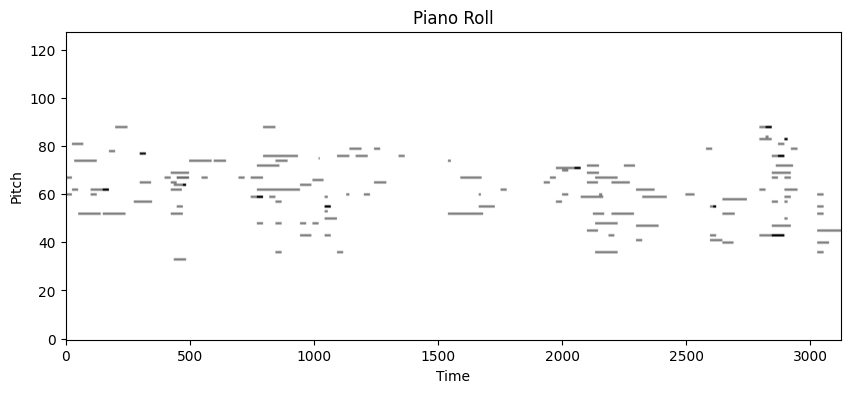

Melody notes: [67, 60, 62, 81, 74, 60, 52, 62, 62, 62, 78, 77, 77, 65, 67, 62, 55, 69, 52, 64, 64, 69, 67, 67, 74, 74, 67, 59, 59, 67, 59, 72, 36, 48, 74, 76, 48, 64, 43, 48, 75, 66, 55, 55, 36, 76, 60, 79, 76, 60, 79, 76, 74, 60, 67, 52, 55, 65, 67, 57, 70, 60, 71, 71, 65, 69, 60, 59, 52, 43, 67, 48, 36, 72, 62, 47, 59, 60, 79, 55, 55, 43, 40, 52, 58, 84, 57, 67, 69, 47, 76, 76, 81, 83, 83, 59, 69, 67, 47, 72, 79, 52, 40, 88, 88, 88, 88, 65, 65, 52, 57, 57, 62, 60, 57, 33, 59, 53, 43, 50, 41, 41, 43, 43, 36, 60, 55, 45, 52, 62, 48, 62, 65, 45, 72, 62, 50, 62, 83]
Harmony (velocity): [82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 66, 82, 82, 82, 82, 82, 82, 82, 82, 82, 98, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 98, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 

In [10]:
# Example usage
midi_file_path = '/Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/Evaluation/data_for_testing/model_output/topk15-t1.0-ngram0/12/midi/0.mid'
midi_data = load_midi(midi_file_path)

# Plot the piano roll
plot_piano_roll(midi_data)

# Analyze melody
melody = analyze_melody(midi_data)
print('Melody notes:', melody)

# Analyze harmony
harmony = analyze_harmony(midi_data)
print('Harmony (velocity):', harmony)

# Calculate note density
note_density = calculate_note_density(midi_data)
print('Note density (notes per second):', note_density)

In [11]:
import pretty_midi
import numpy as np
from collections import Counter
import itertools

def load_midi(file_path):
    return pretty_midi.PrettyMIDI(file_path)

def get_notes(midi_data):
    notes = []
    for instrument in midi_data.instruments:
        if not instrument.is_drum:
            for note in instrument.notes:
                notes.append(note)
    return sorted(notes, key=lambda note: note.start)

def pitch_counts(notes):
    pitches = [note.pitch for note in notes]
    return dict(Counter(pitches))

def pitch_class_distribution(notes):
    pitch_classes = [note.pitch % 12 for note in notes]
    return dict(Counter(pitch_classes))

def pitch_class_transition_matrix(notes):
    pitch_classes = [note.pitch % 12 for note in notes]
    transition_matrix = np.zeros((12, 12))
    for i in range(len(pitch_classes) - 1):
        transition_matrix[pitch_classes[i], pitch_classes[i + 1]] += 1
    return transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

def pitch_range(notes):
    pitches = [note.pitch for note in notes]
    return max(pitches) - min(pitches)

def average_pitch_intervals(notes):
    pitch_intervals = [notes[i + 1].pitch - notes[i].pitch for i in range(len(notes) - 1)]
    return np.mean(pitch_intervals), np.std(pitch_intervals)

def average_inter_onset_intervals(notes):
    inter_onset_intervals = [notes[i + 1].start - notes[i].start for i in range(len(notes) - 1)]
    return np.mean(inter_onset_intervals), np.std(inter_onset_intervals)

def note_length_transition_matrix(notes):
    note_lengths = [note.end - note.start for note in notes]
    unique_lengths = sorted(set(note_lengths))
    length_to_idx = {length: idx for idx, length in enumerate(unique_lengths)}
    transition_matrix = np.zeros((len(unique_lengths), len(unique_lengths)))
    
    for i in range(len(note_lengths) - 1):
        current_length = note_lengths[i]
        next_length = note_lengths[i + 1]
        transition_matrix[length_to_idx[current_length], length_to_idx[next_length]] += 1
    
    return transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

def analyze_midi(file_path):
    midi_data = load_midi(file_path)
    notes = get_notes(midi_data)
    
    analysis = {
        'pitch_counts': pitch_counts(notes),
        'pitch_class_distribution': pitch_class_distribution(notes),
        'pitch_class_transition_matrix': pitch_class_transition_matrix(notes),
        'pitch_range': pitch_range(notes),
        'average_pitch_intervals': average_pitch_intervals(notes),
        'average_inter_onset_intervals': average_inter_onset_intervals(notes),
        'note_length_transition_matrix': note_length_transition_matrix(notes)
    }
    return analysis

# Example usage
# midi_file_path = 'path/to/your/midi/file.mid'

analysis_result = analyze_midi(midi_file_path)

for k, v in analysis_result.items():
    print(k)
    print(v)
    print()


pitch_counts
{67: 11, 60: 10, 62: 11, 81: 2, 74: 5, 52: 8, 78: 1, 88: 4, 57: 5, 77: 2, 65: 6, 69: 5, 64: 3, 33: 1, 55: 7, 59: 7, 72: 4, 48: 5, 76: 6, 36: 4, 43: 6, 66: 1, 75: 1, 53: 1, 50: 2, 79: 4, 71: 2, 70: 1, 45: 2, 47: 3, 41: 2, 40: 2, 58: 1, 83: 3, 84: 1}

pitch_class_distribution
{7: 28, 0: 24, 2: 18, 9: 15, 4: 23, 6: 2, 5: 11, 11: 15, 3: 1, 10: 2}

pitch_class_transition_matrix
[[0.20833333 0.         0.20833333 0.         0.25       0.
  0.04166667 0.25       0.         0.         0.         0.04166667]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan]
 [0.11111111 0.         0.16666667 0.         0.16666667 0.05555556
  0.         0.16666667 0.         0.16666667 0.         0.16666667]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.        ]
 [0.2173913  0.         0.08695652 0.         0.13043478 0.04347826
  0.0434782

/var/folders/y6/qf0ggfbn3hl620td2cm801sw0000gn/T/ipykernel_19157/1552491479.py:30: RuntimeWarning: invalid value encountered in divide
  return transition_matrix / transition_matrix.sum(axis=1, keepdims=True)
/var/folders/y6/qf0ggfbn3hl620td2cm801sw0000gn/T/ipykernel_19157/1552491479.py:55: RuntimeWarning: invalid value encountered in divide
  return transition_matrix / transition_matrix.sum(axis=1, keepdims=True)


In [12]:
import plotly.express as px
import pandas as pd

def plot_pitch_counts(pitch_counts):
    df = pd.DataFrame(pitch_counts.items(), columns=['Pitch', 'Count'])
    fig = px.bar(df, x='Pitch', y='Count', title='Pitch Counts')
    fig.show()

plot_pitch_counts(analysis_result['pitch_counts'])

Pitch Count: the number of unique pitches used in a composition
Pitch Class Distribution: how often each pitch class (note, no octave info) occurs in a piece of music
Pitch Class Transition Matrices: the probability of transitioning from one pitch class to another
Pitch Range: the disparity between the highest and lowest pitches in a musical piece
Average Pitch Intervals: Pitch intervals, expressed in semitones
Note Counts: The number of notes utilized in a composition
Note Length: The distribution of note lengths in the musical pieces

train data:
- melody: musecoco line
- chord: musecoco-like chord (using scale degree) line
    - start
    - duration
    - velocity
    - chord_property_1: cr
    - chord_property_2: ct
    - chord_property_3: ci
    - ...
    - chord_property_n: cs

post processing:
- melody &rarr; midi-like
- midi-like melody &rarr; song key
- song key + chord (using scale degree) &rarr; notes of the chords
- the complete song

advantages:
- decrease random notes
- more stable